### Simon's Algorithm

In this case with have a function that can be wheter *one-to-one* or *two-to-one*. Classicaly, to determine which one it is we have to check up to  $2^{n-1}+1$ outputs. In best case using special classical algorithm it can be reduced in the order fo cumputational complexity to $O(2^{n/2})$, but it grows exponentially with $n$ anyway. Luckily, we can use a quantum algorithm that requires $\approx n$ steps to get a system of equations (complexity of $O(n^3)$) from which it can be determined. In other words, it can really speed-up the process especially with big register due to the cubic growth of the complexity.

In [ ]:
from openql import openql as ql
import hisplot as hp
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
rootDir = os.path.dirname(os.path.realpath("simon.ipynb"))
curdir = os.path.dirname("simon.ipynb")
output_dir = os.path.join(curdir, 'simon_output')
num_qubits = 6

In [ ]:
ql.set_option('output_dir', output_dir)

platform = ql.Platform('platform', 'none')
kernel = ql.Kernel('simon_kernel', platform, num_qubits)

program = ql.Program('simon', platform, num_qubits)


**Initializing**

In [ ]:
kernel.hadamard(0)
kernel.hadamard(1)
kernel.hadamard(2)

**Oracle** <br>for
b = 110

In [ ]:
kernel.cnot(0,3)
kernel.cnot(1,4)
kernel.cnot(2,5)

kernel.cnot(0,3)
kernel.cnot(0,4)


**Diffuser**

In [ ]:
kernel.hadamard(0)
kernel.hadamard(1)
kernel.hadamard(2)

**Measurements**

In [ ]:
kernel.measure(0)
kernel.measure(1)
kernel.measure(2)

In [ ]:
program.add_kernel(kernel)
program.compile()

**Simulation**

In [ ]:
import qxelarator
from functools import reduce

qx = qxelarator.QX()
qx.set('simon_output/simon.qasm')

ntests = 10000
results = []

nmeasure = 3

for i in range(ntests):
    qx.execute()
    res = [int(qx.get_measurement_outcome(q)) for q in range(nmeasure)]
    result = reduce(lambda x, y: x + str(y), res, "|") + "⟩"
    results.append(result)
    

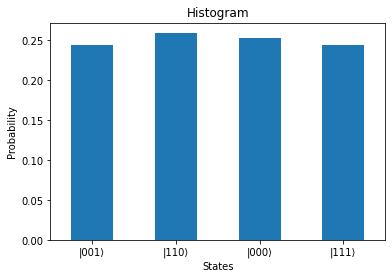

In [ ]:
hp.plot_histogram(results)

These results allows to recover the value of $b$ string by solving system of equtions where: $b\cdot result_n = 0$

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ee9a0e1-5142-4a5e-b221-8d22021093a4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>